Alumno: Erick Salvador Alvarez Valencia

## Demostrar que para una señal $g(n) = \sum_{k = 0}^{N - 1}C_k S_k(n)$ sólo hay $N$ señales distintas

Tenemos que $S_k(n) = e^{i \omega kn} = e^{i2 \pi k f_0 n}$

Ahora, sabemos por definición que la siguiente propiedad se cumple:

$$S_k(n + N) = e^{i2 \pi k f_0 (n + N)} = e^{i2 \pi k f_0 n} = S_k(n)$$

De acuerdo a lo anterior, como el periodo es $N$ sólo hay $N$ exponenciales complejas.

Ahora se demostrará que esto también se cumple con una combinación lineal de la señal anterior.
Se tiene que: $g(n) = \sum_{k = 0}^{N - 1}C_k S_k(n)$

Por lo que:

$$g(n + N) = \sum_{k = 0}^{N - 1}C_k S_k(n + N)$$
$$= \sum_{k = 0}^{N - 1}C_k e^{i2 \pi k f_0 (n + N)}$$

Pero por la propiedad anterior:

$$= \sum_{k = 0}^{N - 1}C_k e^{i2 \pi k f_0 n} = g(n)$$

Con lo cual vemos que la periodicidad también aplica a la combinación lineal de las señales exponenciales.

Text(0.5,1,'Muestro de la función $y = cos(at^2)$')

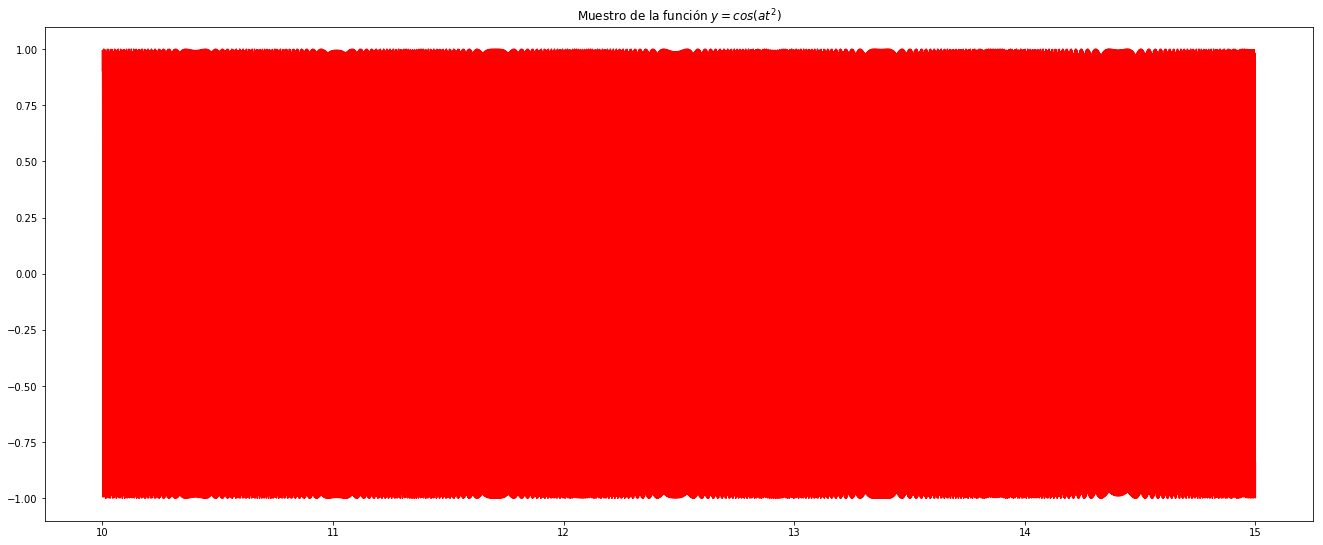

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from math import *

def derivative(t, a):
    return -2.0 * a * t * np.sin(a * t * t)

def get_domain(b0, b1, n):
    dt = fabs(b1 - b0) / (n - 1)
    t = np.zeros(n, dtype = 'float64')
    for i in range(n):
        t[i] = b0 + i * dt
    return t

def fs_max(b0, b1, a, n):
    dt = (b1 - b0) / (n - 1)
    t = get_domain(b0, b1, n)
    y = derivative(t, a)
    return max(y)

def create_graph(b0, b1, a):
    #Obtener la frecuencia de muestreo
    Fs = 2.0 * fs_max(b0, b1, a, 5000)
    T = 1.0 / Fs
    t = get_domain(b0, b1, int((b1 - b0) / T))
    y = np.cos(a * t * t)
    return t, y

a = 60.0
b0 = 10.0
b1 = 15.0
t, y = create_graph(b0, b1, a)

%matplotlib inline
fig = plt.figure(figsize = (50, 20))
ax = fig.add_subplot(221)

ax.plot(t, y, 'k', color = "red")
ax.set_title("Muestro de la función $y = cos(at^2)$")

Como vemos la señal anterior no se puede apreciar bien después debido a la escala del plotter, por lo cual se mostrará la misma en un intervalo más pequeño.

La mínima frecuencia de muestreo es: 2422


Text(0.5,1,'Muestro de la función $y = cos(at^2)$')

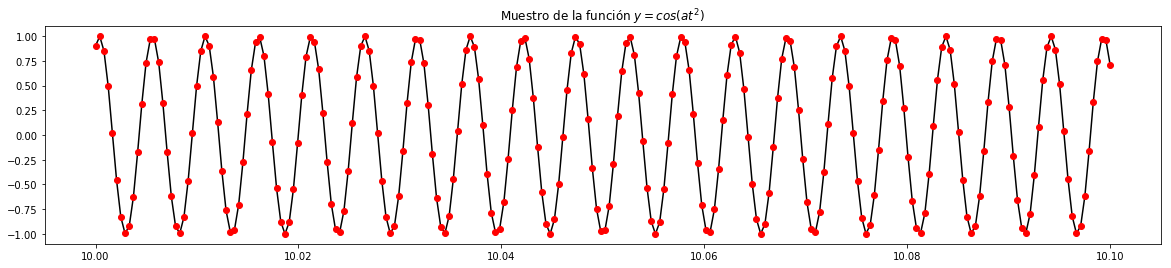

In [98]:
a = 60.0
b0 = 10.0
b1 = 10.1

#Obtener la frecuencia de muestreo
Fs = 2.0 * fs_max(b0, b1, a, 1000)
print("La mínima frecuencia de muestreo es: " + str(ceil(Fs)))
T = 1.0 / (Fs)
t = get_domain(b0, b1, int((b1 - b0) / T))
y = np.cos(a * t * t)

%matplotlib inline
fig = plt.figure(figsize = (20, 4))
ax = fig.add_subplot(111)

ax.plot(t, y, 'k', t, y, 'ro')
ax.set_title("Muestro de la función $y = cos(at^2)$")

Igualmente podemos hacer un zoom a la gráfica original con el método $\textit{axis}$ de pyplot.

[11, 11.05, -1.0, 1.0]

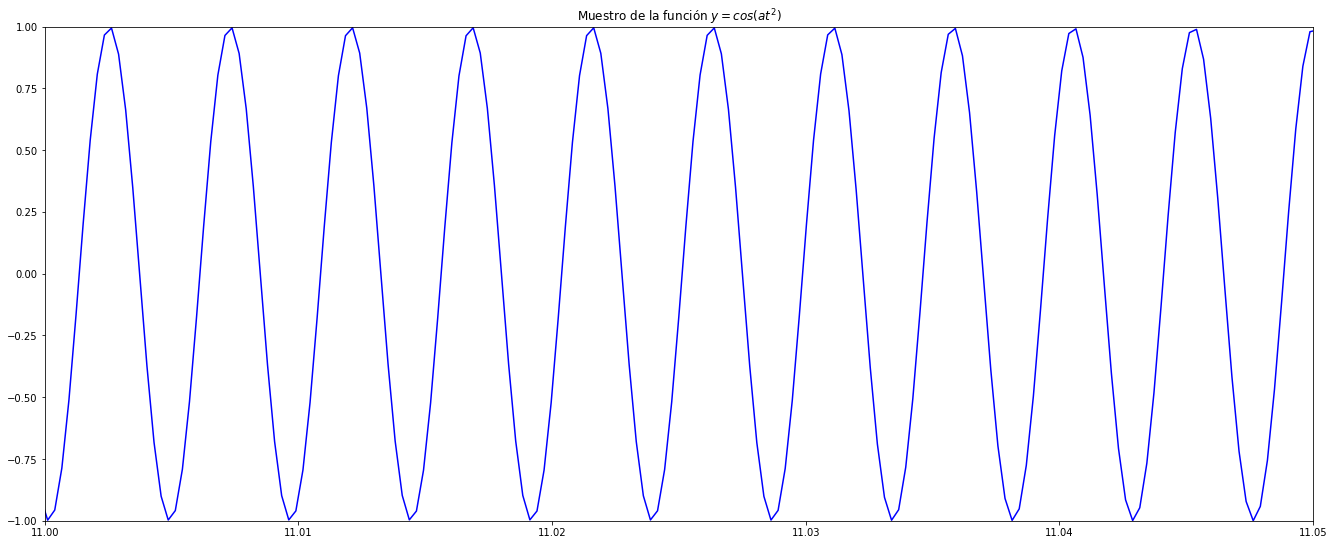

In [99]:
a = 60.0
b0 = 10.0
b1 = 15.0
t, y = create_graph(b0, b1, a)

%matplotlib inline
fig = plt.figure(figsize = (50, 20))
ax = fig.add_subplot(221)

ax.plot(t, y, 'k', color = "blue")
ax.set_title("Muestro de la función $y = cos(at^2)$")
ax.axis([11, 11.05, -1.0, 1.0])

## $s(x, b) = cos(a(x^2 + y^2))$

178.58477668557416 118.9064953362755


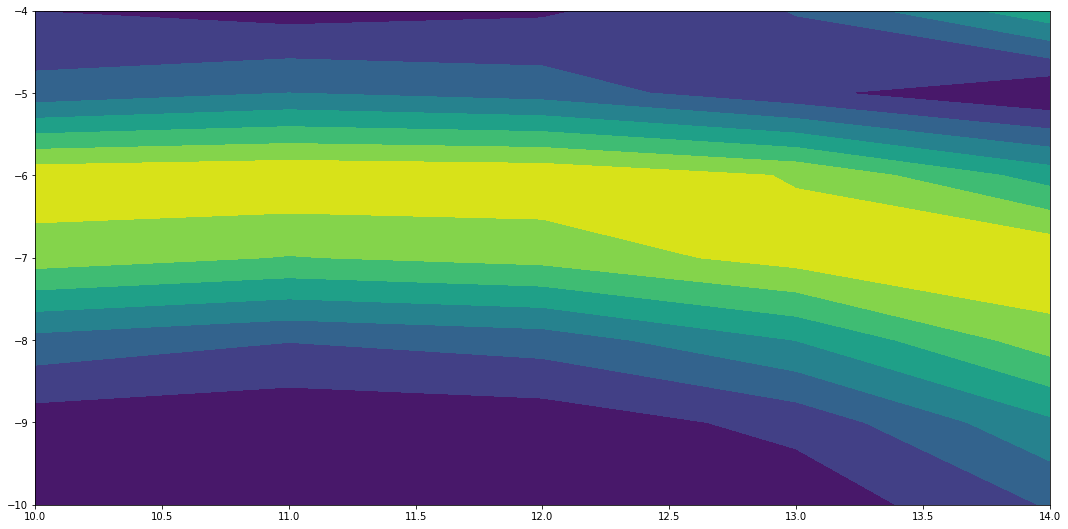

In [105]:
def f(x, y, a):
    return np.cos(a * (x * x + y * y))

def par_derivative_x(x, y, a):
    return -2.0 * a *  x * np.sin(a * (x * x + y * y))

def par_derivative_y(x, y, a):
    return -2.0 * a *  y * np.sin(a * (x * x + y * y))

def fs_max_xy(x0, x1, y0, y1, a, n):
    x = get_domain(x0, x1, n)
    y = get_domain(y0, y1, n)
    zx = par_derivative_x(x, y, a)
    zy = par_derivative_y(x, y, a)
        
    return max(zx), max(zy)

def create_graph_xy(x0, x1, y0, y1, a):
    #Obtener la frecuencia de muestreo
    Fs_x, Fs_y = fs_max_xy(x0, x1, y0, y1, a, 1000)
    print(Fs_x * 2.0, Fs_y * 2.0)
    Tx = 1.0 / (2.0 * Fs_x)
    Ty = 1.0 / (2.0 * Fs_y)
    x = np.arange(x0, x1, 1.0)
    y = np.arange(y0, y1, 1.0)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y, a)
    
    fig = plt.figure(figsize = (40, 20))
    ax = fig.add_subplot(221)
    ax.contourf(X, Y, Z)
    #cset = ax.contour(Z, np.arange(-1, 1.5, 0.2), linewidths = 2, cmap = cm.Set2)

a = 3.0
x0 = 10
x1 = 15
y0 = -10
y1 = -3


create_graph_xy(x0, x1, y0, y1, a)